# Aula 06 - Dados nD - netCDF
Nesta aula trabalhamos com dados 3 ou 4 D em formato netCDF. Utilizamos o pacote https://docs.xarray.dev/en/stable/ e trabalharemos com os dados da plataforma https://disc.gsfc.nasa.gov/

## baixando dados do GESDISC
- crie um login
- Digite uma palavra-chave que descreva o dado que deseja
- 

In [1]:
import os

pastaAtual = os.getcwd()

pastaDados = r"C:\Users\bruno\Desktop\UFSC\2024.2\ENS410064\2024\dados_entrada"
listaDados = os.listdir(pastaDados)

prefixed = [filename for filename in os.listdir(pastaDados) if filename.startswith('MERRA2')] 
        

In [2]:
# Abrir arquivos do MERRA utilizando o xarray
import xarray as xr
import netCDF4 as nc

dataset = nc.Dataset(pastaDados+'\\'+prefixed[0])      #abrindo só um arquivo
print(dataset)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Comment: filename: MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    Filename: MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    Conventions: CF-1
    Institution: NASA Goddard Space Flight Center
    References: http://gmao.gsfc.nasa.gov ; https://doi.org/10.4209/aaqr.210105 ; https://doi.org/10.1029/2022EA002375
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: V1
    TemporalRange: 2000-01-01 -> 2024-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: MERRA2_CNN_HAQAST_PM25
    GranuleID: MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    ProductionDateTime: 2024-06-25T01:34:15.870456Z
    LongName: MERRA2_CNN_HAQAST bias corrected global hourly surface total PM2.5 mass concentration V1.0
    title: MERRA2_CNN_HAQAST bias corrected global hourly surface total PM2.5 mass concentration V1.0
    SouthernmostLatitude: -90.0
    NorthernmostLatitude: 90.0
    WesternmostLongitude: -180.0
  

In [3]:
# Acessando o dado de PM2.5

pm25 = dataset['MERRA2_CNN_Surface_PM25'][:]
print(pm25.shape)

(24, 361, 576)


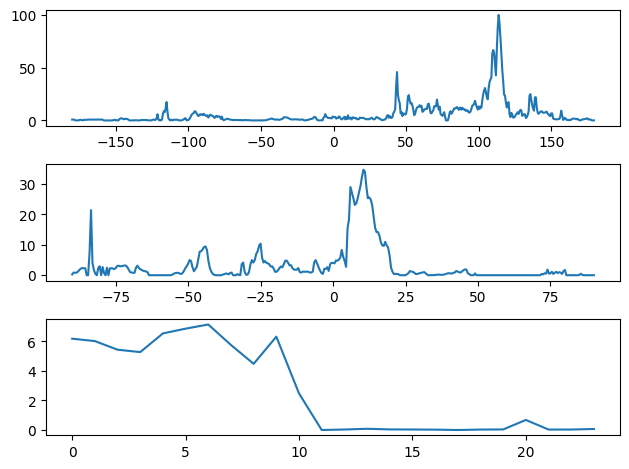

In [4]:
# Plotando o dado 1D
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3)

# Para o tempo - time = 0 no indice da matriz y=250
ax[0].plot(dataset['lon'][:], pm25[0,250,:])

# Para o tempo - time = 0 no indice da matriz x=200
ax[1].plot(dataset['lat'][:], pm25[0,:,200])

# Para todo o tempo em um ponto específico
ax[2].plot(dataset['time'][:], pm25[:,250,100])

plt.tight_layout()


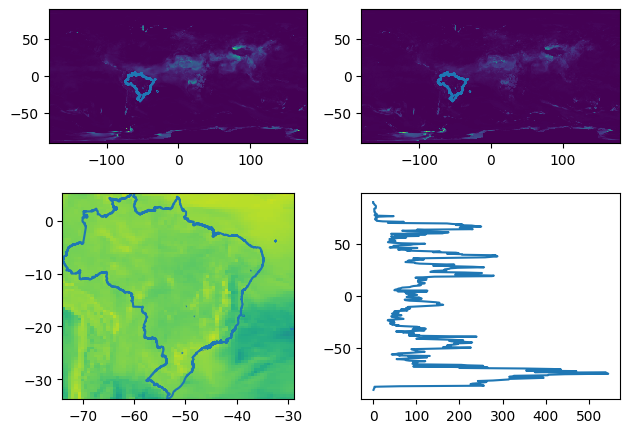

In [5]:
# Operações com o numpy
import numpy as np
import geopandas as gpd
import matplotlib

br = gpd.read_file(r"C:\Users\bruno\Desktop\UFSC\2024.2\ENS410064\2024\dados_entrada\BR_Pais_2022\BR_Pais_2022.shp")

fig,ax=plt.subplots(2,2)

# média do dia em todos os locais
ax[0,0].pcolor(dataset['lon'][:], dataset['lat'][:], np.mean(pm25,axis=0))
br.boundary.plot(ax=ax[0,0])

# maxima do dia em todos os locais
ax[0,1].pcolor(dataset['lon'][:], dataset['lat'][:], np.max(pm25,axis=0))
br.boundary.plot(ax=ax[0,1])

# zoom no brasil
ax[1,0].pcolor(dataset['lon'][:], dataset['lat'][:], np.mean(pm25,axis=0), norm=matplotlib.colors.LogNorm())
br.boundary.plot(ax=ax[1,0])
ax[1,0].set_xlim([br.bounds.minx[0],br.bounds.maxx[0]])
ax[1,0].set_ylim([br.bounds.miny[0],br.bounds.maxy[0]])

# Máxima emissão em todas as latitudes
ax[1,1].plot(np.max(np.max(pm25[:,:,:], axis=0), axis=1),dataset['lat'][:])

plt.tight_layout()


In [15]:
# Abrir todos os arquivos da pasta
os.chdir(pastaDados)

import xarray as xr
xds = xr.open_mfdataset(prefixed)   # Abrindo os 2 arquivos

pm25 = xds['MERRA2_CNN_Surface_PM25'][:]
pm25

<xarray.DataArray 'MERRA2_CNN_Surface_PM25' (time: 48, lat: 361, lon: 576)> Size: 40MB
dask.array<concatenate, shape=(48, 361, 576), dtype=float32, chunksize=(1, 361, 576), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 384B 2024-05-05T00:30:00 ... 2024-05-06T23...
  * lat      (lat) float32 1kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 2kB -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
Attributes:
    units:      ug m-3
    long_name:  Bias corrected surface total PM2.5 mass concentration

In [14]:
import rioxarray